In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
# Upload all datasets
word_categorization = pd.read_csv("filtered_word_categorization.csv") # 186
word_recognition = pd.read_csv("filtered_word_recognition.csv") # 186
word_frequency = pd.read_csv("filtered_word_frequency.csv") # 186
wc_mt_statistics = pd.read_csv("filtered_wc_mt_statistics.csv", header=[0]) # 186

In [5]:
wc_mt_statistics

,user_id,voucher,valid,language,WC_CorrAns_RT_mean_1,WC_CorrAns_RT_SD_1,WC_correct_answers_percentage_1,WC_information_1,WC_information_rate_1,MT_IC_1,MT_EC_1,MT_IW_1,MT_EW_1,MT_NG_1,MT_C_1
0,10150,1,1,0,1276.411290,761.122664,95.384615,0.730172,0.574757,9.5,42.0,11.5,14.0,23.0,51.5
1,10158,1,1,0,2535.634921,1195.208142,96.923077,0.801765,0.315936,30.0,3.5,28.0,0.0,38.5,33.5
2,1051,1,1,0,1172.094488,556.644933,97.692308,0.841616,0.721431,25.0,34.0,5.0,3.0,33.0,59.0
3,10105,1,1,0,1505.227642,708.781639,94.615385,0.697484,0.464427,39.5,9.0,16.0,2.0,33.5,48.5
4,105,1,1,0,1992.731481,1384.931257,83.076923,0.344058,0.162794,26.0,0.5,17.5,0.5,55.5,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,10434,1,1,0,1066.629921,593.299725,97.692308,0.841616,0.793229,11.0,54.5,1.5,13.0,20.0,65.5
182,10435,1,1,0,1902.201550,2397.098946,99.230769,0.934927,0.493151,12.5,75.5,5.5,2.5,4.0,88.0
183,10436,1,1,0,1006.580645,597.979880,95.384615,0.730172,0.717744,3.0,62.0,2.0,33.0,0.0,65.0
184,10437,1,1,0,1756.441860,803.851146,99.230769,0.934927,0.525558,62.0,10.5,16.5,0.5,10.5,72.5


In [4]:
word_recognition

,user_id,voucher,valid,language,word,given_response_choice_old_new,given_response_choice_alive_manmade,wasOld_new,was_in_alive_manmade_list
0,10150,1,1,0,OYSTER,2,NaN,0,0.0
1,10150,1,1,0,BEE,4,4.0,0,0.0
2,10150,1,1,0,RABBIT,2,NaN,1,NaN
3,10150,1,1,0,MULE,2,NaN,1,NaN
4,10150,1,1,0,DRUM,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...
37395,10440,1,1,0,RAT,1,NaN,0,0.0
37396,10440,1,1,0,CAPITAL,1,NaN,1,NaN
37397,10440,1,1,0,SHEEP,5,1.0,0,0.0
37398,10440,1,1,0,SHED,1,NaN,0,1.0


In [ ]:
user_100 = word_categorization["user_id"]

In [5]:
# Upload the new datasets create on this notebook
# Note: If is the first time that you are runing the notebook and you don't have this csv don't run it this cell
user_percent_results = pd.read_csv("user_precision_results_reorganized_updated.csv")
user_rt_std = pd.read_csv("user_rt_std.csv")

In [22]:
word_categorization

,user_id,voucher,valid,language,word,user_given_response,expected_correct_response,is_user_response_correct,alive_notAlive,manmade_notManmade,response_time_ms
0,10150,1,1,0,EASEL,1,1,1,NaN,1.0,1465.0
1,10150,1,1,0,POTATO,0,0,1,NaN,0.0,1325.0
2,10150,1,1,0,HOTEL,1,1,1,NaN,1.0,2032.0
3,10150,1,1,0,OYSTER,0,0,1,NaN,0.0,1189.0
4,10150,1,1,0,MOLE,0,0,1,NaN,0.0,1421.0
...,...,...,...,...,...,...,...,...,...,...,...
24305,10440,1,1,0,ROSE,0,1,0,1.0,NaN,800.0
24306,10440,1,1,0,GOLF,0,0,1,0.0,NaN,615.0
24307,10440,1,1,0,SHAWL,0,0,1,0.0,NaN,1150.0
24308,10440,1,1,0,DANCER,1,1,1,1.0,NaN,955.0


# 1. Calculate precision (%) for explicit and implicit correct answers
 - We define the explicit and implicit answers.
 - Calculate the precision (%)
 
 Explicit = correct
 
 Implicit = incorrect

In [23]:
# Create new columns for each category, replacing NaN with clear labels.
word_categorization["Category_Alive"] = word_categorization["alive_notAlive"].map({1: "Alive", 0: "Not Alive"})
word_categorization["Category_ManMade"] = word_categorization["manmade_notManmade"].map({1: "ManMade", 0: "Not ManMade"})

In [26]:
# Calculate the total number of words submitted per user
total_words_per_user = word_categorization.groupby("user_id")["word"].count().reset_index()
total_words_per_user.rename(columns={"word": "Total_Words"}, inplace=True)

# Calculate the total number of correct answers per user
correct_answers_per_user = word_categorization[word_categorization["is_user_response_correct"] == 1].groupby("user_id")["is_user_response_correct"].count().reset_index()
correct_answers_per_user.rename(columns={"is_user_response_correct": "Correct_Answers"}, inplace=True)

# Join both tables to calculate the accuracy
precision_per_user = total_words_per_user.merge(correct_answers_per_user, on="user_id", how="left")

# Fill NaN in Correct_Answers with 0 (users who did not have correct answers)
precision_per_user["Correct_Answers"].fillna(0, inplace=True)

# Create a new column for incorrect accuracy
precision_per_user["Incorrect_Answers"] = precision_per_user["Total_Words"] - precision_per_user["Correct_Answers"]
precision_per_user["Correct_Precision (%)"] = (precision_per_user["Correct_Answers"] / precision_per_user["Total_Words"]) * 100
precision_per_user["Incorrect_Precision (%)"] = (precision_per_user["Incorrect_Answers"] / precision_per_user["Total_Words"]) * 100

# Rearrange the columns in the requested order
precision_per_user = precision_per_user[["user_id", "Total_Words", "Correct_Answers", "Incorrect_Answers", 
                                         "Correct_Precision (%)", "Incorrect_Precision (%)"]]

# Save the updated table in a CSV file
file_path = "user_precision_results_reorganized.csv"
precision_per_user.to_csv(file_path, index=False)

# Show the reorganised table and the path to the saved file
print("Accuracy table reorganised and stored in:", file_path)
print(precision_per_user.head())

Accuracy table reorganised and stored in: user_precision_results_reorganized.csv
   user_id  Total_Words  Correct_Answers  Incorrect_Answers  \
0      103          130              130                  0   
1      104          130              127                  3   
2      105          130              108                 22   
3     1012          130              128                  2   
4     1014          130              123                  7   

   Correct_Precision (%)  Incorrect_Precision (%)  
0             100.000000                 0.000000  
1              97.692308                 2.307692  
2              83.076923                16.923077  
3              98.461538                 1.538462  
4              94.615385                 5.384615  


### Division by categories

(cp = correct precision)

(ip = incorrect precision)

In [27]:
# Calculate accuracy by category (Alive/Not Alive and ManMade/Not ManMade)

# Filter data by category
word_categorization_alive = word_categorization.dropna(subset=["Category_Alive"])
word_categorization_manmade = word_categorization.dropna(subset=["Category_ManMade"])

# Calculate accuracy by user and category
category_precision_alive = word_categorization_alive.groupby(["user_id", "Category_Alive"])["is_user_response_correct"].agg(["sum", "count"]).reset_index()
category_precision_manmade = word_categorization_manmade.groupby(["user_id", "Category_ManMade"])["is_user_response_correct"].agg(["sum", "count"]).reset_index()

# Rename columns
category_precision_alive.rename(columns={"sum": "Correct_Answers", "count": "Total_Answers"}, inplace=True)
category_precision_manmade.rename(columns={"sum": "Correct_Answers", "count": "Total_Answers"}, inplace=True)

# Calculating incorrect answers and accuracy by category
category_precision_alive["Incorrect_Answers"] = category_precision_alive["Total_Answers"] - category_precision_alive["Correct_Answers"]
category_precision_alive["Correct_Precision (%)"] = (category_precision_alive["Correct_Answers"] / category_precision_alive["Total_Answers"]) * 100
category_precision_alive["Incorrect_Precision (%)"] = (category_precision_alive["Incorrect_Answers"] / category_precision_alive["Total_Answers"]) * 100

category_precision_manmade["Incorrect_Answers"] = category_precision_manmade["Total_Answers"] - category_precision_manmade["Correct_Answers"]
category_precision_manmade["Correct_Precision (%)"] = (category_precision_manmade["Correct_Answers"] / category_precision_manmade["Total_Answers"]) * 100
category_precision_manmade["Incorrect_Precision (%)"] = (category_precision_manmade["Incorrect_Answers"] / category_precision_manmade["Total_Answers"]) * 100

# Load the file user_precision_results_reorganized.csv
user_precision_results_reorganized = pd.read_csv(file_path)

# Verify that the user_id column is present to make the merge.
if "user_id" not in user_precision_results_reorganized.columns:
    raise ValueError("La columna 'user_id' no está en el archivo cargado.")

# Initialise the new columns to 0 to avoid problems with NaN
new_columns = ["CP_Alive", "CP_Not_Alive", "CP_ManMade", "CP_Not_ManMade",
               "IP_Alive", "IP_Not_Alive", "IP_ManMade", "IP_Not_ManMade"]
for col in new_columns:
    user_precision_results_reorganized[col] = 0.0

# Create a dictionary to assign the values correctly
category_precision_dict = {}

# Add correct accuracy values from the Alive/Not Alive table
for _, row in category_precision_alive.iterrows():
    user_id = row["user_id"]
    category = row["Category_Alive"]
    if user_id not in category_precision_dict:
        category_precision_dict[user_id] = {}
    category_precision_dict[user_id][f"CP_{category}"] = row["Correct_Precision (%)"]
    category_precision_dict[user_id][f"IP_{category}"] = row["Incorrect_Precision (%)"]

# Add correct accuracy values from the ManMade/Not ManMade table
for _, row in category_precision_manmade.iterrows():
    user_id = row["user_id"]
    category = row["Category_ManMade"]
    if user_id not in category_precision_dict:
        category_precision_dict[user_id] = {}
    category_precision_dict[user_id][f"CP_{category}"] = row["Correct_Precision (%)"]
    category_precision_dict[user_id][f"IP_{category}"] = row["Incorrect_Precision (%)"]

# Assign the values to the existing DataFrame
for user_id, values in category_precision_dict.items():
    for col, value in values.items():
        user_precision_results_reorganized.loc[user_precision_results_reorganized["user_id"] == user_id, col] = value

# Delete columns that have been created in error
columns_to_remove = ["CP_Not_Alive", "IP_Not_Alive", "CP_Not_ManMade", "IP_Not_ManMade"]
user_precision_results_reorganized = user_precision_results_reorganized.drop(columns=[col for col in columns_to_remove if col in user_precision_results_reorganized.columns], errors='ignore')

# Rearrange the columns in the requested order
columns_order = [
    "user_id", "Total_Words", "Correct_Answers", "Incorrect_Answers",
    "Correct_Precision (%)", "Incorrect_Precision (%)",
    "CP_Alive", "IP_Alive", "CP_Not Alive", "IP_Not Alive", 
    "CP_ManMade", "IP_ManMade", "CP_Not ManMade", "IP_Not ManMade"
]

# Ensure that all columns exist in the DataFrame before reorganizing
columns_order = [col for col in columns_order if col in user_precision_results_reorganized.columns]
user_precision_results_reorganized = user_precision_results_reorganized[columns_order]

# Save the new table with the additional columns
file_path_updated = "user_precision_results_reorganized_updated.csv"
user_precision_results_reorganized.to_csv(file_path_updated, index=False)

# Show the table and the path to the saved file
print("Accurately updated table by category stored in:", file_path_updated)
print(user_precision_results_reorganized.head())


Accurately updated table by category stored in: user_precision_results_reorganized_updated.csv
   user_id  Total_Words  Correct_Answers  Incorrect_Answers  \
0      103          130              130                  0   
1      104          130              127                  3   
2      105          130              108                 22   
3     1012          130              128                  2   
4     1014          130              123                  7   

   Correct_Precision (%)  Incorrect_Precision (%)  CP_Alive  IP_Alive  \
0             100.000000                 0.000000   100.000     0.000   
1              97.692308                 2.307692    96.875     3.125   
2              83.076923                16.923077    78.125    21.875   
3              98.461538                 1.538462    96.875     3.125   
4              94.615385                 5.384615    84.375    15.625   

   CP_Not Alive  IP_Not Alive  CP_ManMade  IP_ManMade  CP_Not ManMade  \
0         100.

In [37]:
# Calculate the accuracy of the correct and incorrect precision
total_correct_percentage = user_percent_results["Correct_Precision (%)"].mean()
total_incorrect_percentage = user_percent_results["Incorrect_Precision (%)"].mean()

# Create a DataFrame with the results
accuracy_summary_df = pd.DataFrame({
    "Category": ["Correct_Precision (%)", "Incorrect_Precision (%)"],
    "Percentage": [total_correct_percentage, total_incorrect_percentage]
})

accuracy_summary_df

,Category,Percentage
0,Correct_Precision (%),95.800248
1,Incorrect_Precision (%),4.199752


#### Some graphics

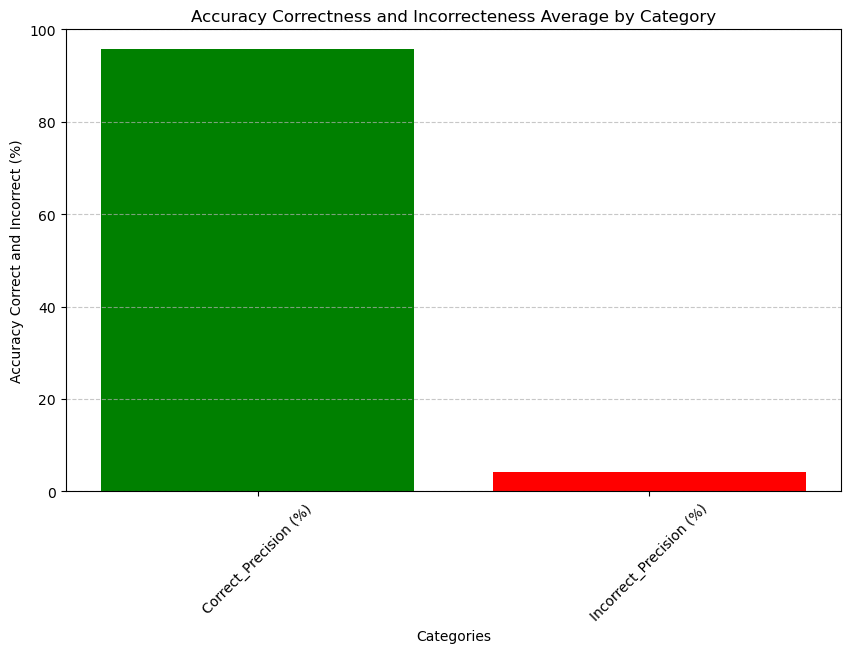

In [31]:
# Create a figure to visualise the correct accuracy in correct and incorrect answers
plt.figure(figsize=(10, 6))
categories = ["Correct_Precision (%)", "Incorrect_Precision (%)"]
mean_values = user_precision_results_reorganized[categories].mean()

# Create the bar chart
plt.bar(categories, mean_values, color=['green', 'red'])
plt.xlabel("Categories")
plt.ylabel("Accuracy Correct and Incorrect (%)")
plt.title("Accuracy Correctness and Incorrecteness Average by Category")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.show()


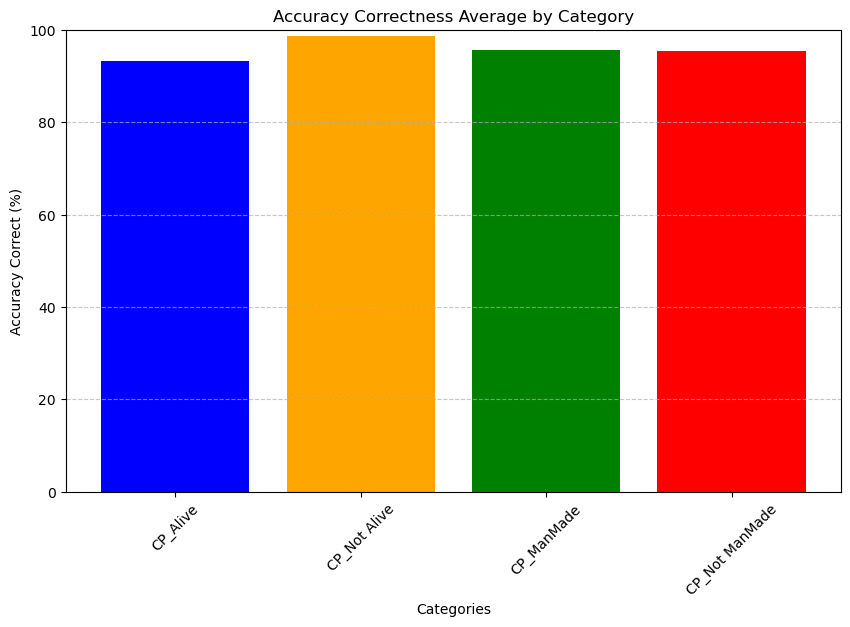

In [30]:
# Create a figure to visualise the correct accuracy per category
plt.figure(figsize=(10, 6))
categories = ["CP_Alive", "CP_Not Alive", "CP_ManMade", "CP_Not ManMade"]
mean_values = user_precision_results_reorganized[categories].mean()

# Create the bar chart
plt.bar(categories, mean_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Categories")
plt.ylabel("Accuracy Correct (%)")
plt.title("Accuracy Correctness Average by Category")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.show()


Graphical interpretation:
 - It is observed that all categories have accuracy values above 90%, suggesting that users have responded with high accuracy in all classifications.

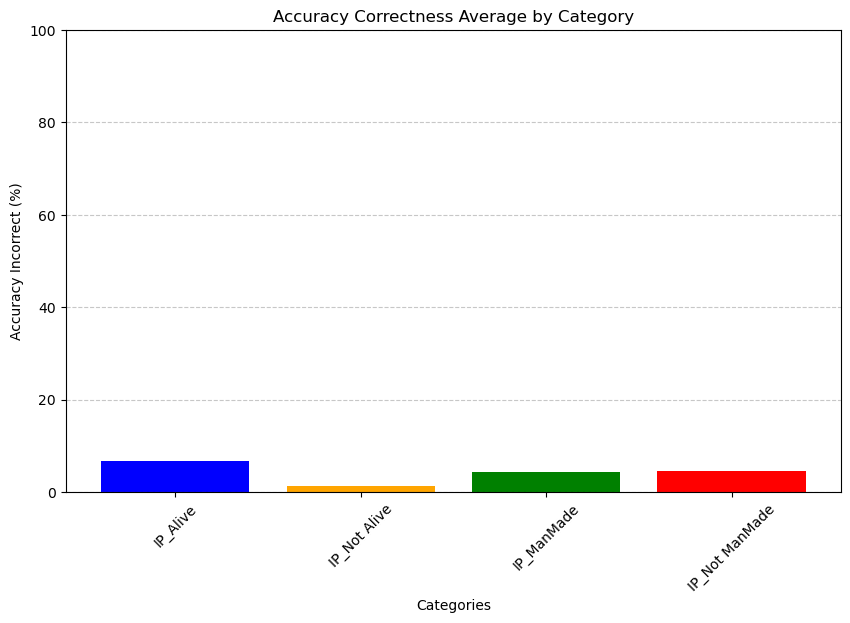

In [32]:
# Create a figure to visualise the correct accuracy per category
plt.figure(figsize=(10, 6))
categories = ["IP_Alive", "IP_Not Alive", "IP_ManMade", "IP_Not ManMade"]
mean_values = user_precision_results_reorganized[categories].mean()

# Create the bar chart
plt.bar(categories, mean_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Categories")
plt.ylabel("Accuracy Incorrect (%)")
plt.title("Accuracy Correctness Average by Category")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.show()
